[1.5726851847787993, 0.07413655531080332]
[1.5940095271207348, 0.12168244181266175]


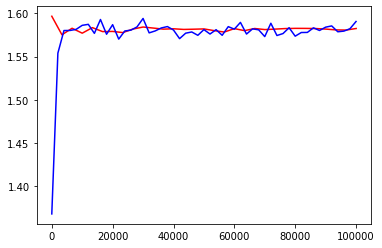

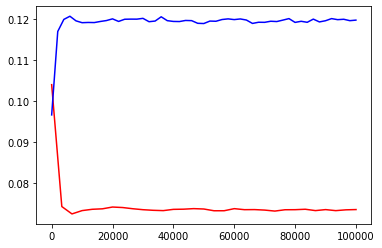

In [1]:
import Library.DIY as t1
import math
import matplotlib.pyplot as plt
import numpy as np


def f1(x):
    return 1/(x**2 + np.cos(x)**2)

def f2(x,L):
    return L*np.exp(-L*x)/(1-np.exp(-np.pi*L)) 

def f3(x,L):
    return -(1/L)*np.log(1-(1-np.exp(-np.pi*L))*x)  

def f4(x,L):
    return 1


x = t1.inverse_sampling(f3,10000,0.1,0.8)

print(t1.importance_sampling(f1,f4,f2,x,0.8))

x = t1.LCG2(10000,0,np.pi,0.1)

print(t1.montec(f1,0,np.pi,10000,x))

A,B,C=t1.solution_plotter(f1,f4,f2,0.8,f3,100000,0.1)
P,Q,R=t1.crude_montec_plotter(f1,0,np.pi,100000,0.1)

figure1=plt.figure()
plt.plot(A,B,color='red')
plt.plot(P,Q,color='blue')

figure2=plt.figure()
plt.plot(A,C,color='red')
plt.plot(P,R,color='blue')

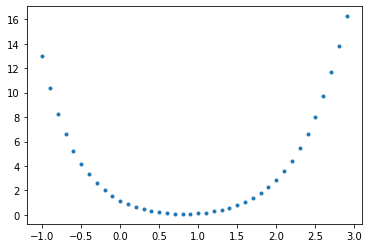

In [2]:
t1.minimizer(-1,3,f1,f4,f2,f3,10000,0.1,0.1)

0.522


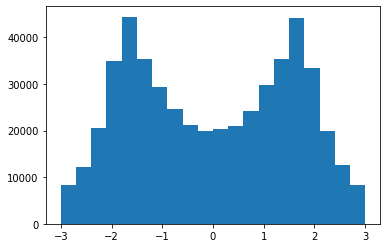

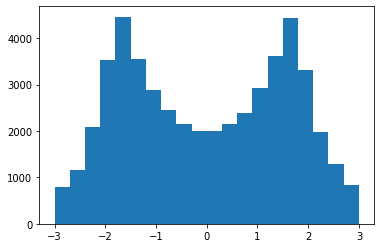

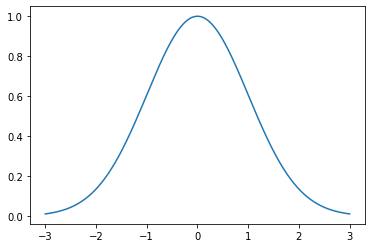

In [3]:
def fx(x,L):
    return np.exp(-L*(x**2))
    #return L*np.exp(-L*x)/(1-np.exp(-np.pi*L)) 

x= t1.markov_sampling(1000000,-3,3,fx,0.5,0,2.5,5)

t1.markov_sample_plotter(fx,x,-3,3,0.5)

# def f5(x):
#     return 